# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data & Rename Columns

In [2]:
df = pd.read_csv('Mall_Customers_Start.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_Short = df[['Spending_Score','Income']]

# Elbow Method to Indetify Clusters

In [4]:
import sklearn.cluster as cluster

## Run Cluster Analysis 12 times

- We run the Cluster Analysis using Cluster as 1 till 12. Also, we store the WSS Scores. The WSS score will be used to create the Elbow Plot
- WSS = Within-Cluster-Sum of Squared

In [5]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

## We Store the Number of clusters along with their WSS Scores in a DataFrame

In [6]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37271.886237
6,7,30241.343618
7,8,25063.652516
8,9,21826.936303
9,10,19755.619861


# Plot Elbow Plot

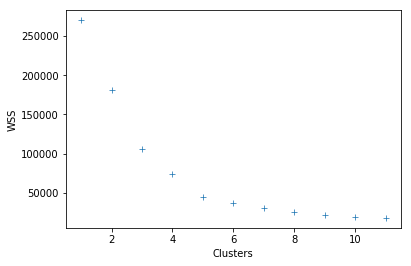

In [7]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
# We get 5 Clusters

## -- 5 Clusters Identified as per Elbow Method

# Silhouette Method to Indentify Clusters

In [8]:
import sklearn.metrics as metrics

In [9]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.5379675585622219
Silhouette score for k(clusters) = 7 is 0.5367379891273258
Silhouette score for k(clusters) = 8 is 0.4592958445675391
Silhouette score for k(clusters) = 9 is 0.45770857148861777
Silhouette score for k(clusters) = 10 is 0.446735677440187
Silhouette score for k(clusters) = 11 is 0.4472950813160941
Silhouette score for k(clusters) = 12 is 0.4257901147260263


## -- Max Silhouette Score as k = 5, Hence 5 Clusters is the right option

# Perform K-Mean Clustering with 5 Clusters

In [10]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

# Plot Clusters on Chart

In [11]:
df['Clusters'] = kmeans.labels_

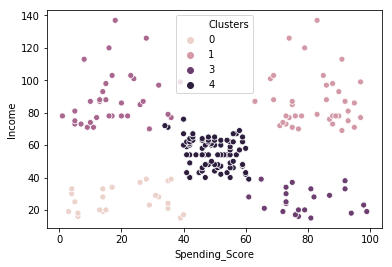

In [12]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

# END